In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Plot styling
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Step 2: Load data
data_path = "../data/raw/insurance.csv"
df = pd.read_csv(data_path)

In [3]:
# Step 3: Overview
print("Shape of dataset:", df.shape)
display(df.head())
display(df.info())
display(df.describe())

Shape of dataset: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
# Step 4: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
# Step 5: Categorical vs Numerical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)


Categorical Columns: ['sex', 'smoker', 'region']
Numerical Columns: ['age', 'bmi', 'children', 'charges']


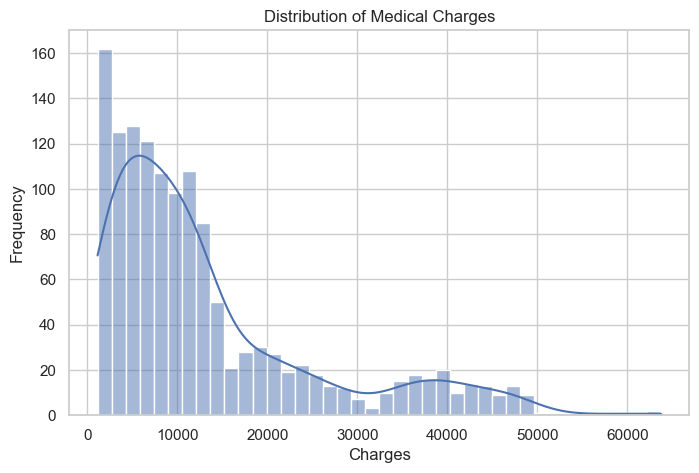

In [6]:
# Step 6: Target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True, bins=40)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

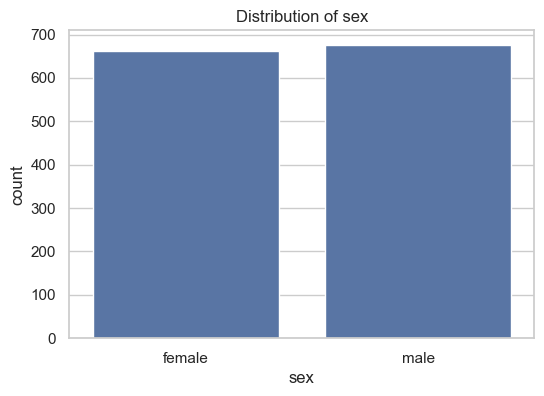

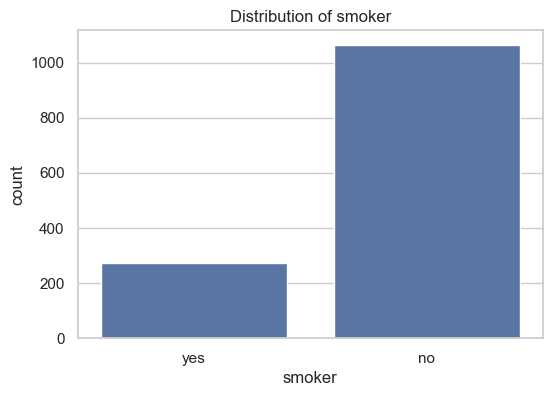

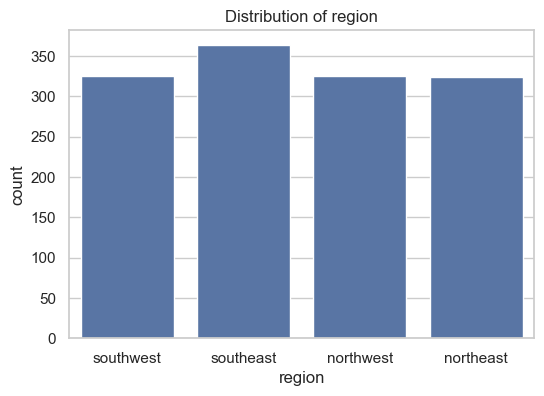

In [7]:
# Step 7: Categorical Feature Distributions
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

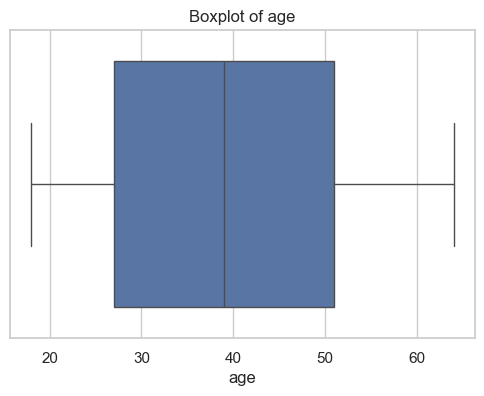

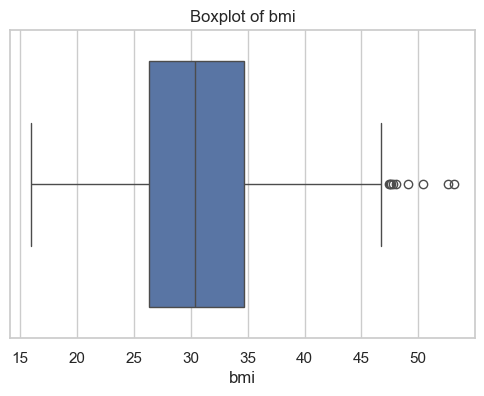

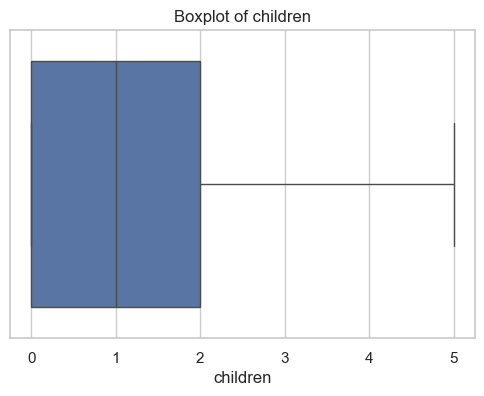

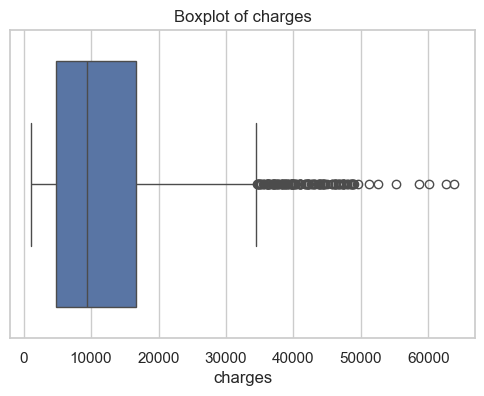

In [8]:
# Step 8: Numerical Feature Distributions
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

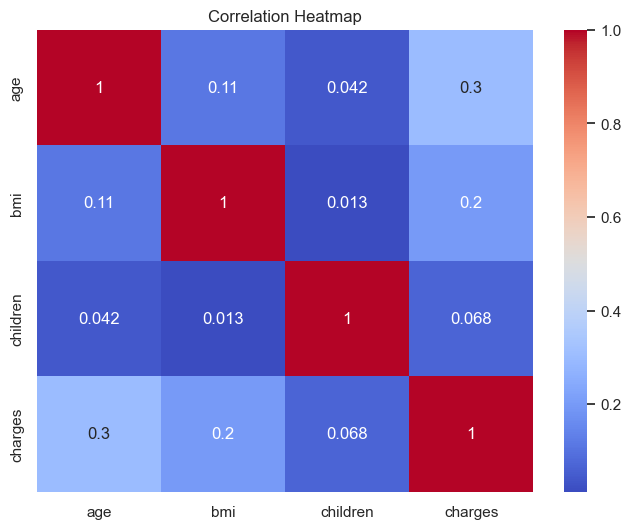

In [9]:
# Step 9: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

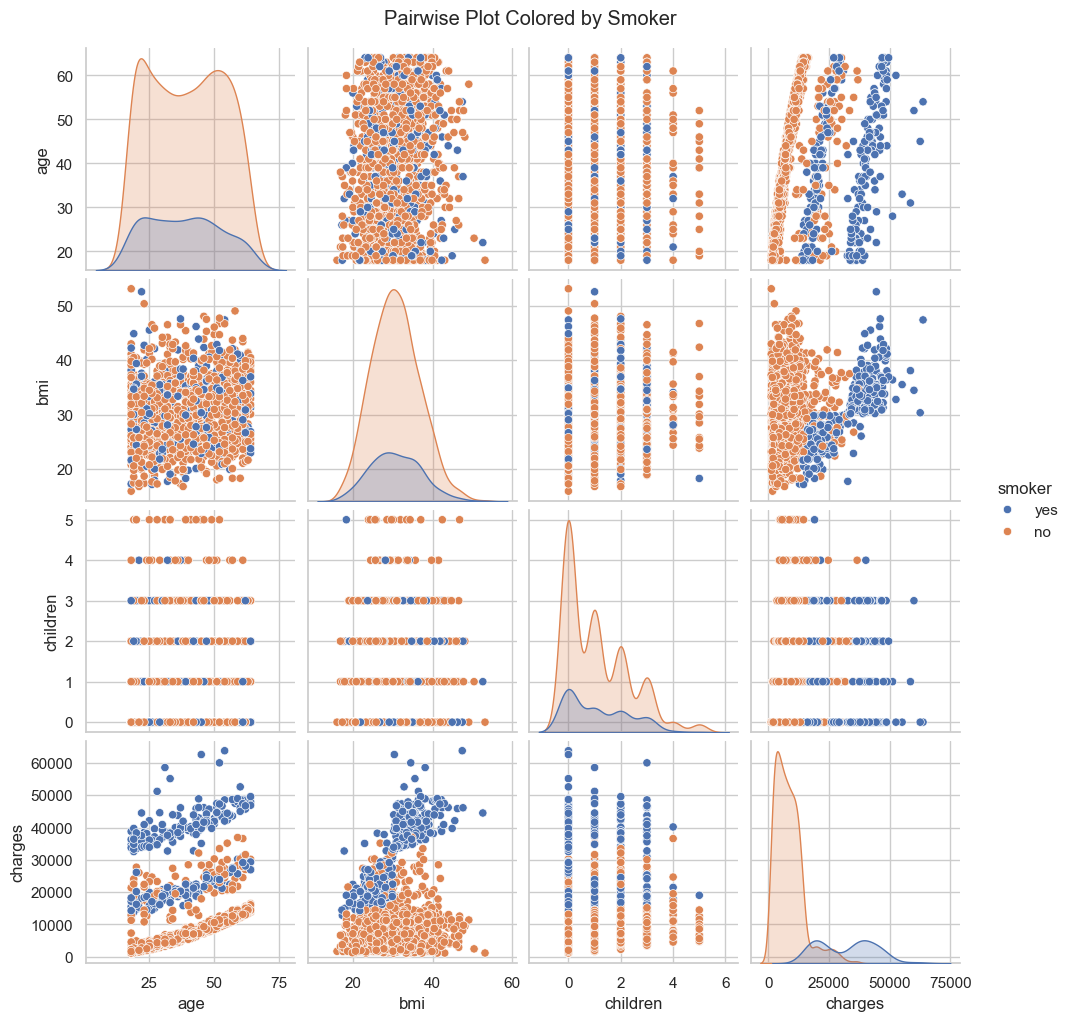

In [10]:
# Step 10: Pairplot (Bonus: colored by smoker)
sns.pairplot(df, hue='smoker', diag_kind='kde')
plt.suptitle("Pairwise Plot Colored by Smoker", y=1.02)
plt.show()